In [1]:
import numpy as np
from DHAM import Build_Matrices
from DHAM import Optimize_Dhamed
from DHAM import DHAM
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.optimize import minimize

In [2]:
Temp = 303.15
with open('px.dat') as f:
    px = [line.rstrip() for line in f]

In [3]:
nbins = 600
lag = 245

states = np.linspace(0, 40.0, nbins)

Biasing_Pot = 5000*0.00239

In [4]:
c_ij = []
bias_i= []
for i in tqdm(px):
    trj = np.abs(np.asarray(pd.read_table(i, skiprows=17, sep=r'\s+', header=None)[1][:1400000]*10))
    c_ij.append(Build_Matrices.Count_Matrix(trj, lag, states))
    bias_i.append(Build_Matrices.Bias_Matrix(trj, Biasing_Pot, states))
                
    

  0%|                                                    | 0/81 [00:00<?, ?it/s]


TypeError: Bias_Matrix() missing 1 required positional argument: 'cen'

In [6]:
c_ij = np.asarray(c_ij)
bias_i = np.asarray(bias_i)

In [7]:
MM = DHAM.Construct_MM(c_ij, bias_i.T, 303.15)

/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: overflow encountered in scalar multiply
  denominator += n_i_k * np.exp(-(u_i_k-u_j_k)/2)
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: overflow encountered in exp
  denominator += n_i_k * np.exp(-(u_i_k-u_j_k)/2)
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: invalid value encountered in scalar multiply
  denominator += n_i_k * np.exp(-(u_i_k-u_j_k)/2)


In [8]:
print(MM[0])

[3.35777760e-02 5.68192857e-02 9.19737907e-02 1.33115638e-01
 1.63364944e-01 1.69188977e-01 1.46110990e-01 1.02174987e-01
 5.84377202e-02 2.85790950e-02 1.14141245e-02 3.83301905e-03
 1.08092455e-03 2.71252922e-04 4.63250431e-05 1.03670902e-05
 7.83180403e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [9]:
M=MM
d, v = eig(M.T)
mpeq = v[:, np.where(d == np.max(d))[0][0]]
mpeq = mpeq / np.sum(mpeq)
mU2 = -303.15*1.9872041E-3 * np.log(mpeq)
mU2 -= np.min(mU2[:int(len(states))])

/home/chem/msuttg/miniconda3/envs/kaggle/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/chem/msuttg/miniconda3/envs/kaggle/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


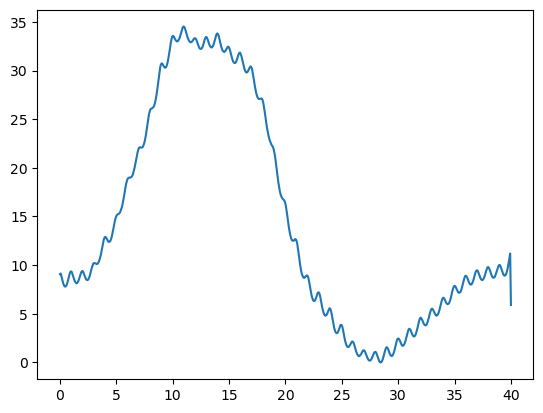

In [9]:
plt.plot(states, mU2*4.184)
plt.show()

In [41]:
step = 100000
n_bins = 40
lag=245
Biasing_Pot = 5000*0.00239
fe = []
states = np.linspace(0,40.0, n_bins)
tot_trj = []
tot_cen = []


for j in tqdm(px):
    trj = np.abs(np.asarray(pd.read_table(j, skiprows=17, sep=r'\s+', header=None)[1]))*10
    tot_trj.append(trj)
    tot_cen.append(trj[0])


trj_len =1400000
for i in range(n_bins, 1000, n_bins):
    print(i)
    states = np.linspace(0,40.0, i)
    c_ij = []
    bias_i= []
    for j in range(len(tot_trj)):
        c_ij.append(Build_Matrices.Count_Matrix(tot_trj[j], lag, states))
        bias_i.append(Build_Matrices.Bias_Matrix(tot_trj[j], Biasing_Pot, states, tot_cen[j]))

    c_ij = np.asarray(c_ij)
    bias_i = np.asarray(bias_i)
    
    MM = DHAM.Construct_MM(c_ij, bias_i.T, 303.15)
    d, v = eig(MM.T)
    mpeq = v[:, np.where(d == np.max(d))[0][0]]
    mpeq = mpeq / np.sum(mpeq)
    mU2 = -303.15*1.9872041E-3 * np.log(mpeq)
    mU2 -= np.min(mU2[:int(len(states))])
    fe.append(mU2)

100%|███████████████████████████████████████████| 81/81 [00:13<00:00,  6.14it/s]


40


/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: overflow encountered in exp
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: invalid value encountered in scalar multiply
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)


80
120
160
200
240
280
320
360
400
440
480
520
560
600
640
680
720
760
800
840
880
920
960


/home/chem/msuttg/miniconda3/envs/kaggle/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/chem/msuttg/miniconda3/envs/kaggle/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


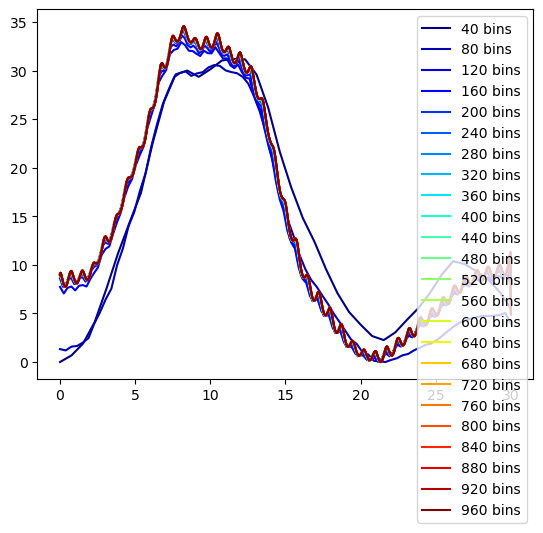

In [44]:
colors = plt.cm.jet(np.linspace(0,1,len(fe)))
for counter,i in enumerate(fe):
    plt_states = np.linspace(0, 30.0, ((counter+1)*40))
    plt.plot(plt_states, i*4.184, color=colors[counter], label=f'{(counter+1)*40} bins')

plt.legend()
plt.show()

In [5]:
step = 50000
n_bins = 250
lag=245
Biasing_Pot = 5000*0.00239

states = np.linspace(0,40.0, n_bins)
fe_con = []
trj_len =1400000
for i in range(step, trj_len+1, step):
    c_ij = []
    bias_i= []
    for j in tqdm(px):
        trj = np.abs(np.asarray(pd.read_table(j, skiprows=17, sep=r'\s+', header=None)[1]))*10
        cen = trj[0]
        trj = trj[:i]
        c_ij.append(Build_Matrices.Count_Matrix(trj, lag, states))
        bias_i.append(Build_Matrices.Bias_Matrix(trj, Biasing_Pot, states, cen))

    c_ij = np.asarray(c_ij)
    bias_i = np.asarray(bias_i)
    
    MM = DHAM.Construct_MM(c_ij, bias_i.T, 303.15)
    d, v = eig(MM.T)
    mpeq = v[:, np.where(d == np.max(d))[0][0]]
    mpeq = mpeq / np.sum(mpeq)
    mU2 = -303.15*1.9872041E-3 * np.log(mpeq)
    mU2 -= np.min(mU2[:int(len(states))])
    fe_con.append(mU2)

100%|███████████████████████████████████████████| 81/81 [00:13<00:00,  5.94it/s]
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: overflow encountered in exp
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: invalid value encountered in scalar multiply
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)
100%|███████████████████████████████████████████| 81/81 [00:14<00:00,  5.65it/s]
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: overflow encountered in exp
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: invalid value encountered in scalar multiply
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)
100%|███████████████████████████████████████████| 81/81 [00:14<00:00,  5.47i

/home/chem/msuttg/miniconda3/envs/kaggle/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/chem/msuttg/miniconda3/envs/kaggle/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


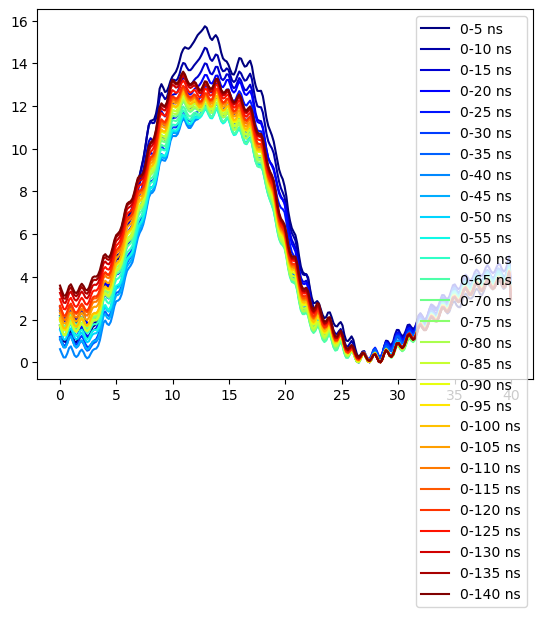

In [6]:
colors = plt.cm.jet(np.linspace(0,1,len(fe_con)))
for counter,i in enumerate(fe_con):
    plt.plot(states, i/(303.15*0.001987), color=colors[counter], label=f'0-{(counter+1)*5} ns')

plt.legend()
plt.show()

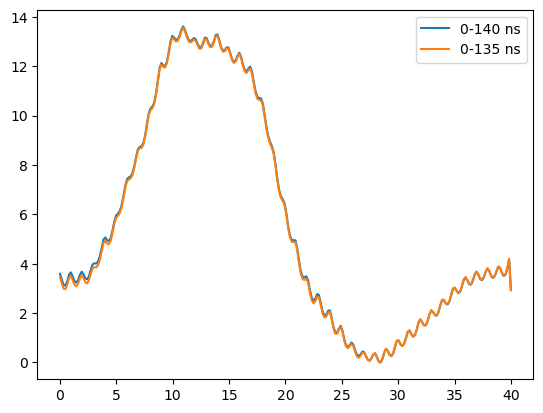

In [72]:
plt.plot(states, (fe_con[-1]*4.184)/(303.15*0.008314), label=f'0-140 ns')
plt.plot(states, (fe_con[-2]*4.184)/(303.15*0.008314), label=f'0-135 ns')
plt.legend()
plt.show()

In [4]:
step = 50000
n_bins = 250
lag=245
Biasing_Pot = 5000*0.00239

states = np.linspace(0,40.0, n_bins)
fe_con_20o = []
trj_len =1400000
for i in range(200000+step, trj_len+1, step):
    c_ij = []
    bias_i= []
    for j in tqdm(px):
        trj = np.abs(np.asarray(pd.read_table(j, skiprows=17, sep=r'\s+', header=None)[1]))*10
        cen = trj[0]
        trj = trj[200000:i]
        c_ij.append(Build_Matrices.Count_Matrix(trj, lag, states))
        bias_i.append(Build_Matrices.Bias_Matrix(trj, Biasing_Pot, states, cen))

    c_ij = np.asarray(c_ij)
    bias_i = np.asarray(bias_i)
    
    MM = DHAM.Construct_MM(c_ij, bias_i.T, 303.15)
    d, v = eig(MM.T)
    mpeq = v[:, np.where(d == np.max(d))[0][0]]
    mpeq = mpeq / np.sum(mpeq)
    mU2 = -303.15*1.9872041E-3 * np.log(mpeq)
    mU2 -= np.min(mU2[:int(len(states))])
    fe_con_20o.append(mU2)

100%|███████████████████████████████████████████| 81/81 [00:13<00:00,  5.93it/s]
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: overflow encountered in exp
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: invalid value encountered in scalar multiply
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)
100%|███████████████████████████████████████████| 81/81 [00:14<00:00,  5.68it/s]
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: overflow encountered in exp
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)
/home/chem/msuttg/REBECCA_NOTMAN_TOOLS/Notman-Group-Tools/DHAM_TESTING/DHAM/DHAM.py:26: RuntimeWarning: invalid value encountered in scalar multiply
  denominator += n_i_k * np.exp(-(u_j_k-u_i_k)/2)
100%|███████████████████████████████████████████| 81/81 [00:14<00:00,  5.48i

KeyboardInterrupt: 

/home/chem/msuttg/miniconda3/envs/kaggle/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/chem/msuttg/miniconda3/envs/kaggle/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


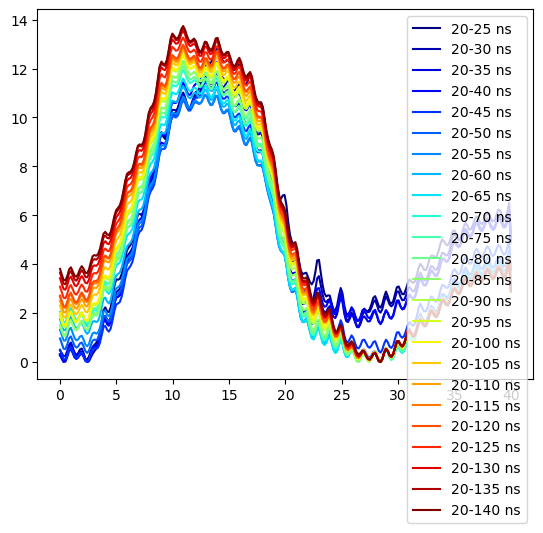

In [74]:
colors = plt.cm.jet(np.linspace(0,1,len(fe_con_20o)))
for counter,i in enumerate(fe_con_20o):
    plt.plot(states, (i*4.184)/(303.15*0.008314), color=colors[counter], label=f'20-{(counter+1)*5+20} ns')

plt.legend()
plt.show()

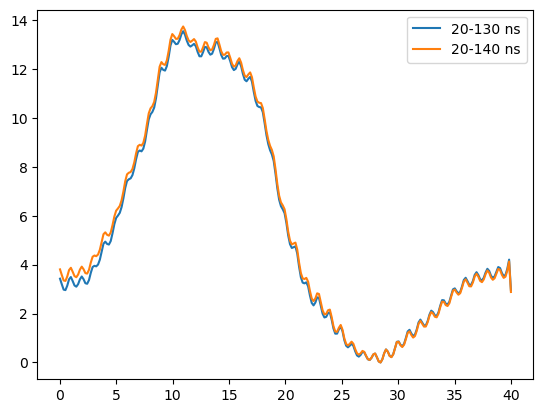

In [80]:
plt.plot(states, (fe_con_20o[-3]*4.184)/(303.15*0.008314), label=f'20-130 ns')
plt.plot(states, (fe_con_20o[-1]*4.184)/(303.15*0.008314), label=f'20-140 ns')
plt.legend()
plt.show()

In [103]:
print(np.max(np.abs(fe_con[-1]-fe_con[-2])))

0.09699343971092089


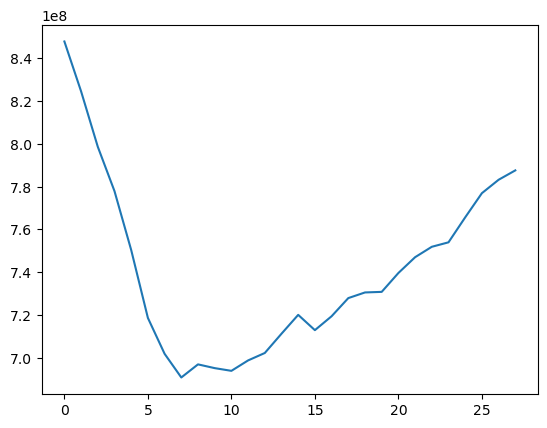

In [109]:
dx = states[1]-states[0]
intg = 0
area =[]
for j in fe_con:
    intg=0
    for i in j:
        intg += (dx*2.72**((i*4.184)/(303.15*0.08314)))/1E-7
    area.append(intg)
plt.plot(np.arange(len(area)), area)
plt.show()